# Dataset source: 

Kaggle - Fifa World Cup
https://www.kaggle.com/datasets/iamsouravbanerjee/fifa-football-world-cup-dataset

Wikipedia
https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_goalscorers

# Data Importing - Import CSV

In [1]:
##import csv files

import pandas as pd
df = pd.read_csv(r'FIFA - 1930.csv')
df1 = pd.read_csv(r'FIFA - 1934.csv')
df2 = pd.read_csv(r'FIFA - 1938.csv')
df3 = pd.read_csv(r'FIFA - 1950.csv')
df4 = pd.read_csv(r'FIFA - 1954.csv')
df5 = pd.read_csv(r'FIFA - 1958.csv')
df6 = pd.read_csv(r'FIFA - 1962.csv')
df7 = pd.read_csv(r'FIFA - 1966.csv')
df8 = pd.read_csv(r'FIFA - 1970.csv')
df9 = pd.read_csv(r'FIFA - 1974.csv')
df10 = pd.read_csv(r'FIFA - 1978.csv')
df11 = pd.read_csv(r'FIFA - 1982.csv')
df12 = pd.read_csv(r'FIFA - 1986.csv')
df13 = pd.read_csv(r'FIFA - 1990.csv')
df14 = pd.read_csv(r'FIFA - 1994.csv')
df15 = pd.read_csv(r'FIFA - 1998.csv')
df16 = pd.read_csv(r'FIFA - 2002.csv')
df17 = pd.read_csv(r'FIFA - 2006.csv')
df18 = pd.read_csv(r'FIFA - 2010.csv')
df19 = pd.read_csv(r'FIFA - 2014.csv')
df20 = pd.read_csv(r'FIFA - 2018.csv')

In [2]:
##concateate all data frames to make master dataframe to allow for analysis

Master = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20], axis=0)

In [3]:
print(Master)


    Year  Position            Team  Games Played  Win  Draw  Loss  Goals For  \
0   1934         1           Italy             4    3     1     0         11   
1   1934         2  Czechoslovakia             4    3     0     1          9   
2   1934         3         Germany             4    3     0     1         11   
3   1934         4         Austria             4    2     0     2          7   
4   1934         5           Spain             2    1     1     0          4   
..   ...       ...             ...           ...  ...   ...   ...        ...   
27  2018        28      Costa Rica             3    0     1     2          2   
28  2018        29         Iceland             3    0     1     2          2   
29  2018        30         Morocco             3    0     1     2          2   
30  2018        31           Egypt             3    0     0     3          2   
31  2018        32          Panama             3    0     0     3          2   

    Goals Against Goal Difference  Poin

# Data Importing - Web Scraping

My Master dataset does not have the top scorer at each tournament  so i need to find this information on the internet

In [4]:
##import beautiful soup package for parsing HTML and XML documents. 
##It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.
##https://olympics.com/en/news/fifa-world-cup-golden-boot-winners-top-goal-scorers
##https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_goalscorers

import html5lib
import requests
from bs4 import BeautifulSoup as bs
scorers = requests.get('https://olympics.com/en/news/fifa-world-cup-golden-boot-winners-top-goal-scorers')
Topscorers = bs(scorers.content, 'lxml')

##Our table can be identified by class="TableBasicstyles__Table-sc-1btx7es-1 bROVGk"
table = Topscorers.find("table", {"class":"TableBasicstyles__Table-sc-1btx7es-1 bROVGk"})

Goldenboot = pd.read_html(str(table))[0]
Goldenboot.head()

,Number,FIFA World Cup Edition,Top Goalscorer (Country),Goals Scored
0,1,Uruguay 1930,Guillermo Stabile (Argentina),8
1,2,Italy 1934,Oldrich Nejedly (Czech Republic),5
2,3,France 1938,Leonidas (Brazil),7
3,4,Brazil 1950,Ademir (Brazil),8
4,5,Switzerland 1954,Sandor Kocsis (Hungary),11


# Data Preperation


In [6]:
##Master Data set prep

Master.head()

,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1934,1,Italy,4,3,1,0,11,3,NaN,7
1,1934,2,Czechoslovakia,4,3,0,1,9,6,3,6
2,1934,3,Germany,4,3,0,1,11,8,3,6
3,1934,4,Austria,4,2,0,2,7,7,0,4
4,1934,5,Spain,2,1,1,0,4,2,x,3


In [7]:
## some information about the size of my data set

import numpy as np
print(Master.shape)

(444, 11)


In [8]:
##some values within the Goal Difference column are not set. Null values or values that are typos 
##Need to find all instances where no value for goal diff recorded and then set a value
##im going to create a new column and populate values using a formula
##im then going to drop the old redundant column


# 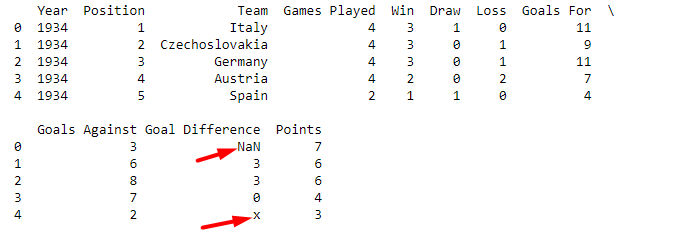

In [9]:
##looking specifically at the original goal diff column values i can see some issues  
print(Master[['Goal Difference']].to_string(index=False))

Goal Difference
            NaN
              3
              3
              0
              x
              1
              0
              0
              x
             −1
             −1
             −1
             −2
             −2
             −3
             −6
              6
             10
              3
              2
              2
              0
             −7
              0
             -1
             -2
             −1
             −1
             −2
             −3
             −6
             10
             16
             −4
             −2
              4
             −2
              1
              0
             −1
             −4
             −2
             −8
             −8
             11
             17
              5
              7
              0
              3
              0
             −1
             −1
             −1
              0
             −3
             −6
             −7
             −8
            −16
             12
        

In [10]:
##can use the Isna method to look at all null values in the original goal diff column 

nan_values = Master[Master['Goal Difference'].isna()]
print(nan_values)

   Year  Position   Team  Games Played  Win  Draw  Loss  Goals For  \
0  1934         1  Italy             4    3     1     0         11   

   Goals Against Goal Difference  Points  
0              3             NaN       7  


In [11]:
##create a function to calculate goal diff for each row and populate in a new column Updated goal diff

def calculate_GoalDiff(row):
    return row['Goals For'] - row['Goals Against']

Master.apply(calculate_GoalDiff, axis=1)

Master['UpdatedGoalDiff'] = Master.apply(calculate_GoalDiff, axis=1)

print(Master)

    Year  Position            Team  Games Played  Win  Draw  Loss  Goals For  \
0   1934         1           Italy             4    3     1     0         11   
1   1934         2  Czechoslovakia             4    3     0     1          9   
2   1934         3         Germany             4    3     0     1         11   
3   1934         4         Austria             4    2     0     2          7   
4   1934         5           Spain             2    1     1     0          4   
..   ...       ...             ...           ...  ...   ...   ...        ...   
27  2018        28      Costa Rica             3    0     1     2          2   
28  2018        29         Iceland             3    0     1     2          2   
29  2018        30         Morocco             3    0     1     2          2   
30  2018        31           Egypt             3    0     0     3          2   
31  2018        32          Panama             3    0     0     3          2   

    Goals Against Goal Difference  Poin

In [12]:
##drop original redundant column
#Updates the DataFrame in place

Master.drop(['Goal Difference'], axis = 1, inplace=True)


In [13]:
## reorder new column before Points column so becomes index 9 

colm = Master.pop("UpdatedGoalDiff")
Master.insert(9, colm.name, colm)

In [14]:
## set index to be the Position column

Master.set_index('Position')

,Year,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
Position,,,,,,,,,,
1,1934,Italy,4,3,1,0,11,3,8,7
2,1934,Czechoslovakia,4,3,0,1,9,6,3,6
3,1934,Germany,4,3,0,1,11,8,3,6
4,1934,Austria,4,2,0,2,7,7,0,4
5,1934,Spain,2,1,1,0,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...
28,2018,Costa Rica,3,0,1,2,2,5,-3,1
29,2018,Iceland,3,0,1,2,2,5,-3,1
30,2018,Morocco,3,0,1,2,2,4,-2,1


In [15]:
##show me the columns and their index 

idx_dic = {}
for col in Master.columns:
    idx_dic[col] = Master.columns.get_loc(col)
print(idx_dic)

{'Year': 0, 'Position': 1, 'Team': 2, 'Games Played': 3, 'Win': 4, 'Draw': 5, 'Loss': 6, 'Goals For': 7, 'Goals Against': 8, 'UpdatedGoalDiff': 9, 'Points': 10}


In [16]:
## Prepare my Goldenboot dataset i retrieved through web scraping
## I need to create a new Year column by coping the values from the FIFA World Cup Edition column so that i can remove the host country name and leave the year
## then ill drop the oringal FIFA World Cup Edition column
## i have done this so i can join this dataset with my master dataset to inculde the Top Goal Scorer for analysis

Goldenboot['Year'] = Goldenboot['FIFA World Cup Edition'].str[-4:]##.split()[0]
Goldenboot.drop(['FIFA World Cup Edition'], axis = 1, inplace=True)
##Goldenboot.insert(loc=1, column="Year", value=['FIFA World Cup Edition'])
Goldenboot.head()


,Number,Top Goalscorer (Country),Goals Scored,Year
0,1,Guillermo Stabile (Argentina),8,1930
1,2,Oldrich Nejedly (Czech Republic),5,1934
2,3,Leonidas (Brazil),7,1938
3,4,Ademir (Brazil),8,1950
4,5,Sandor Kocsis (Hungary),11,1954


# Analysis


In [17]:
##before join data sets Goldenboot & Master together i need to check the data types of the columns to make sure i can join on the key column Year
Master.info()
Goldenboot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 31
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             444 non-null    int64 
 1   Position         444 non-null    int64 
 2   Team             444 non-null    object
 3   Games Played     444 non-null    int64 
 4   Win              444 non-null    int64 
 5   Draw             444 non-null    int64 
 6   Loss             444 non-null    int64 
 7   Goals For        444 non-null    int64 
 8   Goals Against    444 non-null    int64 
 9   UpdatedGoalDiff  444 non-null    int64 
 10  Points           444 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 41.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Number                    21 non-null     in

In [18]:
## need to convert Year object to int as to match

Goldenboot['Year']= Goldenboot['Year'].astype(int)
Goldenboot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Number                    21 non-null     int64 
 1   Top Goalscorer (Country)  21 non-null     object
 2   Goals Scored              21 non-null     int64 
 3   Year                      21 non-null     int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 716.0+ bytes


In [19]:
## Mege datasets togehter on the Year column. I only want to bring in 2 columns from the Goldenboot data set instead of every column

MergedDataset = Master.merge(Goldenboot[["Year", "Top Goalscorer (Country)", "Goals Scored"]])
MergedDataset.head()

,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points,Top Goalscorer (Country),Goals Scored
0,1934,1,Italy,4,3,1,0,11,3,8,7,Oldrich Nejedly (Czech Republic),5
1,1934,2,Czechoslovakia,4,3,0,1,9,6,3,6,Oldrich Nejedly (Czech Republic),5
2,1934,3,Germany,4,3,0,1,11,8,3,6,Oldrich Nejedly (Czech Republic),5
3,1934,4,Austria,4,2,0,2,7,7,0,4,Oldrich Nejedly (Czech Republic),5
4,1934,5,Spain,2,1,1,0,4,2,2,3,Oldrich Nejedly (Czech Republic),5


In [20]:
##show me  winners for each tournament i.e. those teams where position = 1st

WcWinner = Master.loc[Master['Position'] == 1]
WcWinner.set_index('Position')


,Year,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
Position,,,,,,,,,,
1,1934,Italy,4,3,1,0,11,3,8,7
1,1938,Italy,4,4,0,0,11,5,6,8
1,1950,Uruguay,4,3,1,0,15,5,10,7
1,1954,West Germany,6,5,0,1,25,14,11,10
1,1958,Brazil,6,5,1,0,16,4,12,11
1,1962,Brazil,6,5,1,0,14,5,9,11
1,1966,England,6,5,1,0,11,3,8,11
1,1970,Brazil,6,6,0,0,19,7,12,12
1,1974,West Germany,7,6,0,1,13,4,9,12


In [22]:
##show me data for Brazil at each tournament

gk = Master.groupby(['Team'])
gk.get_group('Brazil')



,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
13,1934,14,Brazil,1,0,0,1,1,3,-2,0
2,1938,3,Brazil,5,3,1,1,14,11,3,7
1,1950,2,Brazil,6,4,1,1,22,6,16,9
5,1954,6,Brazil,3,1,1,1,8,5,3,3
0,1958,1,Brazil,6,5,1,0,16,4,12,11
0,1962,1,Brazil,6,5,1,0,14,5,9,11
10,1966,11,Brazil,3,1,0,2,4,6,-2,2
0,1970,1,Brazil,6,6,0,0,19,7,12,12
3,1974,4,Brazil,7,3,2,2,6,4,2,8
2,1978,3,Brazil,7,4,3,0,10,3,7,11


In [23]:
##using group by show position at each tournament for each team

gkk = Master.groupby(['Team', 'Position'])

gkk.first()

Year  Games Played  Win  Draw  Loss  Goals For  \
Team       Position                                                   
Algeria    13        1982             3    2     0     1          5   
           14        2014             4    1     1     2          7   
           22        1986             3    0     1     2          1   
           28        2010             3    0     1     2          0   
Angola     23        2006             3    0     2     1          1   
...                   ...           ...  ...   ...   ...        ...   
Yugoslavia 5         1950             3    2     0     1          7   
           7         1974             6    1     2     3         12   
           8         1954             3    1     1     1          2   
           16        1982             3    1     1     1          2   
Zaire      16        1974             3    0     0     3          0   

                     Goals Against  UpdatedGoalDiff  Points  
Team       Position                                          
Algeria    13                    5                0       4  
           14                    7                0       4  
           22                    5               -4       1  
           28                    2               -2       1  
Angola     23                    2               -1       2  
...                            ...              ...     ...  
Yugoslavia 5                     3                4       4  
           7                     7                5       4  
           8                     3               -1       3  
           16                    2                0       3  
Zaire      16                   14              -14       0  

[366 rows x 9 columns]

In [24]:
##show how many game wins each team has at each world cup

wins = Master.groupby(['Team', 'Year'])['Win'].sum()
print(wins)
##wins.first()

Team        Year
Algeria     1982    2
            1986    0
            2010    0
            2014    1
Angola      2006    0
                   ..
Yugoslavia  1962    3
            1974    1
            1982    1
            1990    3
Zaire       1974    0
Name: Win, Length: 444, dtype: int64


In [25]:
##using a loop show the winners of the world cup and the years they won it

winners = Master[Master['Position'] == 1][['Team', 'Year']]
for team in winners['Team'].unique().tolist():
    years_won = winners[winners['Team'] == team]['Year'].values
    print(f"{team} won {len(years_won)} times in these years {years_won}")

Italy won 4 times in these years [1934 1938 1982 2006]
Uruguay won 1 times in these years [1950]
West Germany won 3 times in these years [1954 1974 1990]
Brazil won 5 times in these years [1958 1962 1970 1994 2002]
England won 1 times in these years [1966]
Argentina won 2 times in these years [1978 1986]
France won 2 times in these years [1998 2018]
Spain won 1 times in these years [2010]
Germany won 1 times in these years [2014]


# Visualization

In [26]:
##import  matplot library

import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
Master.head()

,Year,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,UpdatedGoalDiff,Points
0,1934,1,Italy,4,3,1,0,11,3,8,7
1,1934,2,Czechoslovakia,4,3,0,1,9,6,3,6
2,1934,3,Germany,4,3,0,1,11,8,3,6
3,1934,4,Austria,4,2,0,2,7,7,0,4
4,1934,5,Spain,2,1,1,0,4,2,2,3


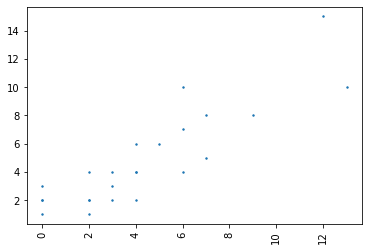

In [28]:

winners = Master[Master['Year'] == 1990][['Team', 'Goals For', 'Points']]
plt.scatter(x = winners['Points'], y = winners['Goals For'], s=2)
plt.xticks(rotation = 90)
##for team, goalsfor, points in winners['Team', 'Goals For', 'Points']:
   ## plt.annotate(team,(points, goalsfor))
plt.show()

<AxesSubplot:xlabel='Win', ylabel='Count'>

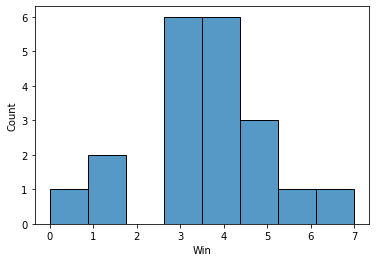

In [29]:
##sns.histplot(Master['Goals For'])
sns.histplot(Master[Master['Team'] == 'Brazil']['Win'])

Text(0.5, 1.0, 'Brazil V Italy Goals for')

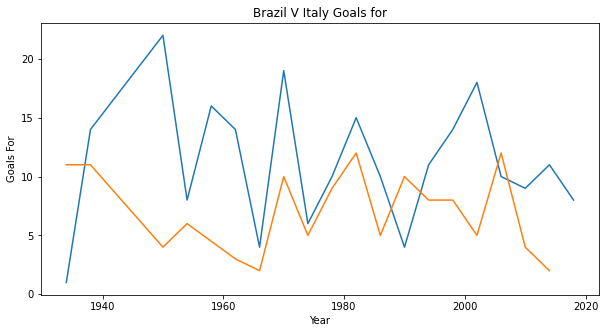

In [30]:
plt.subplots(figsize=(10,5))
Brazil = Master[Master['Team'] == 'Brazil'][['Year','Team', 'Goals For', 'Points']]
Italy = Master[Master['Team'] == 'Italy'][['Year','Team', 'Goals For', 'Points']]
##avgoals = Master['Games Played'] / Master['Goals For']

##plt.plot(Master['Year'],avgoals)                                    
plt.plot(Brazil['Year'],Brazil['Goals For'])
plt.plot(Italy['Year'],Italy['Goals For'])

plt.xlabel('Year')
plt.ylabel('Goals For')
plt.title('Brazil V Italy Goals for')

Text(0.5, 1.0, 'Goal Difference Chart of 1990 World Cup')

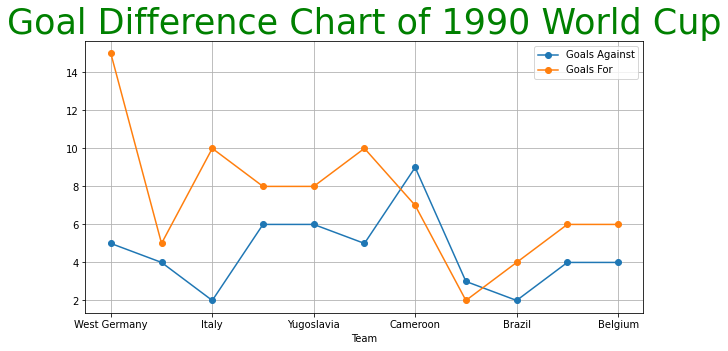

In [31]:
wc1990= Master[Master['Year'] == 1990][['Team', 'Goals For', 'Goals Against']]
wc1990[0:11].plot(x='Team', y=['Goals Against','Goals For'],marker='o',figsize=(10,5))
plt.grid(True)
plt.title(label="Goal Difference Chart of 1990 World Cup",
          fontsize=35,color='Green')

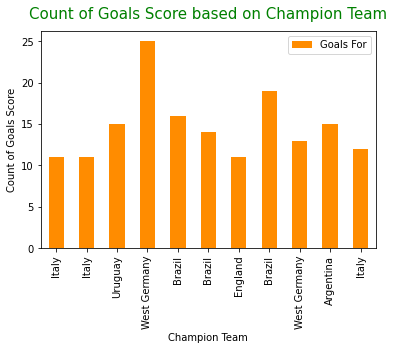

In [32]:
#visualize count of goals scored based on champion team
wcwinner= Master[Master['Position'] == 1][['Team', 'Goals For']]
wcwinner[0:11].plot(x = 'Team', kind = 'bar', color = 'darkorange')
##wc1990.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.xticks(rotation = 90)
##chart = Master.groupby('Win')['Goals For'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'darkorange')
##chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Count of Goals Score based on Champion Team', fontsize = 15, pad = 12, color = 'g')
plt.xlabel('Champion Team')
plt.ylabel('Count of Goals Score')
plt.show()

In [33]:
wc1990= Master[Master['Year'] == 1990][['Team', 'Goals For', 'Goals Against']]

print(wc1990)

                    Team  Goals For  Goals Against
0           West Germany         15              5
1              Argentina          5              4
2                  Italy         10              2
3                England          8              6
4             Yugoslavia          8              6
5         Czechoslovakia         10              5
6               Cameroon          7              9
7    Republic of Ireland          2              3
8                 Brazil          4              2
9                  Spain          6              4
10               Belgium          6              4
11               Romania          4              3
12            Costa Rica          4              6
13              Colombia          4              4
14           Netherlands          3              4
15               Uruguay          2              5
16          Soviet Union          4              4
17               Austria          2              3
18              Scotland       